In [1]:
# dirty hack to temporarily allow relative import
import os
import sys

PACKAGE_PARENT = '..'
SCRIPT_DIR = os.path.dirname(os.path.realpath(os.getcwd()))
print(SCRIPT_DIR)
sys.path.append(os.path.normpath(SCRIPT_DIR))
# sys.path.append(os.path.normpath(os.path.join(SCRIPT_DIR, PACKAGE_PARENT)))

/work/tianjunm/monaural-source-separation


In [2]:
import numpy as np
import torch
import torch.optim as optim
import torch.nn as nn
%load_ext autoreload
%autoreload 2

import librosa
import librosa.display
import matplotlib.pyplot as plt
import scipy.io.wavfile
from scipy.fftpack import dct
import scipy.signal
import IPython.display
import pandas as pd

import json
import datasets.setup
import models.setup
import loss_functions.setup

### Loading the dataset

In [5]:
dataset_spec = '/work/tianjunm/monaural-source-separation/experiments/hyperparameter/dataset/t0-2s-5c/sample.json'
model_spec = '/work/tianjunm/monaural-source-separation/experiments/hyperparameter/model/cSA-BLSTM/sample.json'
with open(dataset_spec) as df, open(model_spec) as mf:
    dataset_spec = json.load(df)
    model_spec = json.load(mf)

In [6]:
train_dataloader = datasets.setup.prepare_dataloader(dataset_spec, model_spec, 'train')

val_dataloader = datasets.setup.prepare_dataloader(dataset_spec, model_spec, 'val')

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/car.csd ...
<Status>: Checking the integrity of the data in <cut_16000_car> computational sequence ...
<Success>: <cut_16000_car> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_car> computational sequence ...
<Success>: <cut_16000_car> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/firetruck_siren.csd ...
<Status>: Checking the integrity of the data in <cut_16000_firetruck_siren> computational sequence ...


<Success>: <cut_16000_firetruck_siren> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_firetruck_siren> computational sequence ...
<Success>: <cut_16000_firetruck_siren> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/civil_defense_siren.csd ...
<Status>: Checking the integrity of the data in <cut_16000_civil_defense_siren> computational sequence ...
<Success>: <cut_16000_civil_defense_siren> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_civil_defense_siren> computational sequence ...
<Success>: <cut_16000_civil_defense_siren> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/banjo.csd ...


  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_16000_banjo> computational sequence ...
<Success>: <cut_16000_banjo> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_banjo> computational sequence ...
<Success>: <cut_16000_banjo> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/church_bell.csd ...
<Status>: Checking the integrity of the data in <cut_16000_church_bell> computational sequence ...


<Success>: <cut_16000_church_bell> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_church_bell> computational sequence ...
<Success>: <cut_16000_church_bell> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/flute.csd ...
<Status>: Checking the integrity of the data in <cut_16000_flute> computational sequence ...
<Success>: <cut_16000_flute> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_flute> computational sequence ...
<Success>: <cut_16000_flute> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/police_siren.csd ...


  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Status>: Checking the integrity of the data in <cut_16000_police_siren> computational sequence ...
<Success>: <cut_16000_police_siren> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_police_siren> computational sequence ...
<Success>: <cut_16000_police_siren> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/electric_guitar.csd ...
<Status>: Checking the integrity of the data in <cut_16000_electric_guitar> computational sequence ...


<Success>: <cut_16000_electric_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_electric_guitar> computational sequence ...
<Success>: <cut_16000_electric_guitar> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/baby_laughter.csd ...
<Status>: Checking the integrity of the data in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/piano.csd ...


  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_16000_piano> computational sequence ...
<Success>: <cut_16000_piano> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_piano> computational sequence ...
<Success>: <cut_16000_piano> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/duck.csd ...
<Status>: Checking the integrity of the data in <cut_16000_duck> computational sequence ...


<Success>: <cut_16000_duck> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_duck> computational sequence ...
<Success>: <cut_16000_duck> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/male_speech.csd ...
<Status>: Checking the integrity of the data in <cut_16000_male_speech> computational sequence ...
<Success>: <cut_16000_male_speech> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_male_speech> computational sequence ...
<Success>: <cut_16000_male_speech> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/female_singing.csd ...


  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_16000_female_singing> computational sequence ...
<Success>: <cut_16000_female_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_female_singing> computational sequence ...
<Success>: <cut_16000_female_singing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/chainsaw.csd ...
<Status>: Checking the integrity of the data in <cut_16000_chainsaw> computational sequence ...


 80%|████████  | 84/105 [00:00<00:00, 828.72 Computational Sequence Entries/s]

<Success>: <cut_16000_chainsaw> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_chainsaw> computational sequence ...
<Success>: <cut_16000_chainsaw> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/keys_jangling.csd ...
<Status>: Checking the integrity of the data in <cut_16000_keys_jangling> computational sequence ...


<Success>: <cut_16000_keys_jangling> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_keys_jangling> computational sequence ...
<Success>: <cut_16000_keys_jangling> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/male_singing.csd ...
<Status>: Checking the integrity of the data in <cut_16000_male_singing> computational sequence ...
<Success>: <cut_16000_male_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_male_singing> computational sequence ...
<Success>: <cut_16000_male_singing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/acoustic_guitar.csd ...


  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Status>: Checking the integrity of the data in <cut_16000_acoustic_guitar> computational sequence ...
<Success>: <cut_16000_acoustic_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_acoustic_guitar> computational sequence ...
<Success>: <cut_16000_acoustic_guitar> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/bark.csd ...
<Status>: Checking the integrity of the data in <cut_16000_bark> computational sequence ...


  0%|          | 0/96 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_16000_bark> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_bark> computational sequence ...
<Success>: <cut_16000_bark> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/snare_drum.csd ...
<Status>: Checking the integrity of the data in <cut_16000_snare_drum> computational sequence ...
<Success>: <cut_16000_snare_drum> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_snare_drum> computational sequence ...
<Success>: <cut_16000_snare_drum> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/bass_guitar.csd ...
<Status>: Checking the integrity of the data in <cut_16000_bass_guitar> computational sequence ...


  0%|          | 0/101 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_16000_bass_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_bass_guitar> computational sequence ...
<Success>: <cut_16000_bass_guitar> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/tambourine.csd ...
<Status>: Checking the integrity of the data in <cut_16000_tambourine> computational sequence ...
<Success>: <cut_16000_tambourine> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_tambourine> computational sequence ...
<Success>: <cut_16000_tambourine> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/violin.csd ...
<Status>: Checking the integrity of the data in <cut_16000_violin> computational sequence ...


<Success>: <cut_16000_violin> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_violin> computational sequence ...
<Success>: <cut_16000_violin> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/fireworks.csd ...
<Status>: Checking the integrity of the data in <cut_16000_fireworks> computational sequence ...
<Success>: <cut_16000_fireworks> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_fireworks> computational sequence ...
<Success>: <cut_16000_fireworks> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/motorboat.csd ...


<Status>: Checking the integrity of the data in <cut_16000_motorboat> computational sequence ...
<Success>: <cut_16000_motorboat> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_motorboat> computational sequence ...
<Success>: <cut_16000_motorboat> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/waterfall.csd ...


  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s]             

<Status>: Checking the integrity of the data in <cut_16000_waterfall> computational sequence ...
<Success>: <cut_16000_waterfall> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_waterfall> computational sequence ...
<Success>: <cut_16000_waterfall> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/saxophone.csd ...
<Status>: Checking the integrity of the data in <cut_16000_saxophone> computational sequence ...


  0%|          | 0/97 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_16000_saxophone> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_saxophone> computational sequence ...
<Success>: <cut_16000_saxophone> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/bird.csd ...
<Status>: Checking the integrity of the data in <cut_16000_bird> computational sequence ...
<Success>: <cut_16000_bird> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_bird> computational sequence ...
<Success>: <cut_16000_bird> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/ukulele.csd ...
<Status>: Checking the integrity of the data in <cut_16000_ukulele> computational sequence ...


<Success>: <cut_16000_ukulele> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_ukulele> computational sequence ...
<Success>: <cut_16000_ukulele> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/engine_idling.csd ...
<Status>: Checking the integrity of the data in <cut_16000_engine_idling> computational sequence ...
<Success>: <cut_16000_engine_idling> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_engine_idling> computational sequence ...
<Success>: <cut_16000_engine_idling> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/frying.csd ...


  0%|          | 0/98 [00:00<?, ? Computational Sequence Entries/s]             

<Status>: Checking the integrity of the data in <cut_16000_frying> computational sequence ...
<Success>: <cut_16000_frying> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_frying> computational sequence ...
<Success>: <cut_16000_frying> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/fixedwing_aircraft_airplane.csd ...
<Status>: Checking the integrity of the data in <cut_16000_fixedwing_aircraft_airplane> computational sequence ...


<Success>: <cut_16000_fixedwing_aircraft_airplane> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_fixedwing_aircraft_airplane> computational sequence ...
<Success>: <cut_16000_fixedwing_aircraft_airplane> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/engine.csd ...
<Status>: Checking the integrity of the data in <cut_16000_engine> computational sequence ...
<Success>: <cut_16000_engine> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_engine> computational sequence ...
<Success>: <cut_16000_engine> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/typing.csd ...


  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s]           

<Status>: Checking the integrity of the data in <cut_16000_typing> computational sequence ...
<Success>: <cut_16000_typing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_typing> computational sequence ...
<Success>: <cut_16000_typing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/telephone_bell_ring.csd ...
<Status>: Checking the integrity of the data in <cut_16000_telephone_bell_ring> computational sequence ...


  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_16000_telephone_bell_ring> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_telephone_bell_ring> computational sequence ...
<Success>: <cut_16000_telephone_bell_ring> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/rain.csd ...
<Status>: Checking the integrity of the data in <cut_16000_rain> computational sequence ...
<Success>: <cut_16000_rain> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_rain> computational sequence ...
<Success>: <cut_16000_rain> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/applause.csd ...
<Status>: Checking the integrity of the data in <cut_16000_applause> computational sequence ...


<Success>: <cut_16000_applause> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_applause> computational sequence ...
<Success>: <cut_16000_applause> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/trumpet.csd ...
<Status>: Checking the integrity of the data in <cut_16000_trumpet> computational sequence ...
<Success>: <cut_16000_trumpet> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_trumpet> computational sequence ...
<Success>: <cut_16000_trumpet> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/writing.csd ...


  0%|          | 0/98 [00:00<?, ? Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_16000_writing> computational sequence ...
<Success>: <cut_16000_writing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_writing> computational sequence ...
<Success>: <cut_16000_writing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/knock.csd ...
<Status>: Checking the integrity of the data in <cut_16000_knock> computational sequence ...


  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_16000_knock> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_knock> computational sequence ...
<Success>: <cut_16000_knock> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/faucet.csd ...
<Status>: Checking the integrity of the data in <cut_16000_faucet> computational sequence ...
<Success>: <cut_16000_faucet> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_faucet> computational sequence ...
<Success>: <cut_16000_faucet> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/vacuum_cleaner.csd ...
<Status>: Checking the integrity of the data in <cut_16000_vacuum_cleaner> computational sequence ...


<Success>: <cut_16000_vacuum_cleaner> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_vacuum_cleaner> computational sequence ...
<Success>: <cut_16000_vacuum_cleaner> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/cowbell.csd ...
<Status>: Checking the integrity of the data in <cut_16000_cowbell> computational sequence ...
<Success>: <cut_16000_cowbell> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_cowbell> computational sequence ...
<Success>: <cut_16000_cowbell> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/shaver.csd ...
<Status>: Checking the integrity of the data in <cut_16000_shaver> computational sequence ...

  0%|          | 0/98 [00:00<?, ? Computational Sequence Entries/s] 


<Success>: <cut_16000_shaver> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_shaver> computational sequence ...
<Success>: <cut_16000_shaver> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/water.csd ...
<Status>: Checking the integrity of the data in <cut_16000_water> computational sequence ...


<Success>: <cut_16000_water> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_water> computational sequence ...
<Success>: <cut_16000_water> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/raindrop.csd ...
<Status>: Checking the integrity of the data in <cut_16000_raindrop> computational sequence ...
<Success>: <cut_16000_raindrop> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_raindrop> computational sequence ...
<Success>: <cut_16000_raindrop> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/wind.csd ...


  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_16000_wind> computational sequence ...
<Success>: <cut_16000_wind> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_wind> computational sequence ...
<Success>: <cut_16000_wind> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/snoring.csd ...
<Status>: Checking the integrity of the data in <cut_16000_snoring> computational sequence ...


<Success>: <cut_16000_snoring> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_snoring> computational sequence ...
<Success>: <cut_16000_snoring> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/child_speech.csd ...
<Status>: Checking the integrity of the data in <cut_16000_child_speech> computational sequence ...
<Success>: <cut_16000_child_speech> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_child_speech> computational sequence ...
<Success>: <cut_16000_child_speech> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
['male_speech.csd' 'typing.csd' 'bark.csd' 'acoustic_guitar.csd'
 'engine.csd']


  0%|          | 0/98 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/car.csd ...
<Status>: Checking the integrity of the data in <cut_16000_car> computational sequence ...
<Success>: <cut_16000_car> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_car> computational sequence ...
<Success>: <cut_16000_car> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/firetruck_siren.csd ...
<Status>: Checking the integrity of the data in <cut_16000_firetruck_siren> computational sequence ...
<Success>: <cut_16000_firetruck_siren> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_firetruck_siren> computational sequence ...
<Success>: <cut_16000_firetruck_siren> computational sequence metadata in correct format
<Success>: C

<Success>: <cut_16000_banjo> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_banjo> computational sequence ...
<Success>: <cut_16000_banjo> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/church_bell.csd ...
<Status>: Checking the integrity of the data in <cut_16000_church_bell> computational sequence ...
<Success>: <cut_16000_church_bell> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_church_bell> computational sequence ...
<Success>: <cut_16000_church_bell> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/flute.csd ...
<Status>: Checking the integrity of the data in <cut_16000_flute> computational sequence ...
<Success>: <cut_16000_

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_16000_electric_guitar> computational sequence ...
<Success>: <cut_16000_electric_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_electric_guitar> computational sequence ...
<Success>: <cut_16000_electric_guitar> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/baby_laughter.csd ...
<Status>: Checking the integrity of the data in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_baby_laughter> computational sequence ...
<Success>: <cut_16000_baby_laughter> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_for

<Success>: <cut_16000_duck> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_duck> computational sequence ...
<Success>: <cut_16000_duck> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/male_speech.csd ...
<Status>: Checking the integrity of the data in <cut_16000_male_speech> computational sequence ...
<Success>: <cut_16000_male_speech> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_male_speech> computational sequence ...
<Success>: <cut_16000_male_speech> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/female_singing.csd ...
<Status>: Checking the integrity of the data in <cut_16000_female_singing> computational sequence ...
<Succes

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Status>: Checking the integrity of the data in <cut_16000_keys_jangling> computational sequence ...
<Success>: <cut_16000_keys_jangling> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_keys_jangling> computational sequence ...
<Success>: <cut_16000_keys_jangling> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/male_singing.csd ...
<Status>: Checking the integrity of the data in <cut_16000_male_singing> computational sequence ...
<Success>: <cut_16000_male_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_male_singing> computational sequence ...
<Success>: <cut_16000_male_singing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000

<Success>: <cut_16000_bark> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_bark> computational sequence ...
<Success>: <cut_16000_bark> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/snare_drum.csd ...
<Status>: Checking the integrity of the data in <cut_16000_snare_drum> computational sequence ...
<Success>: <cut_16000_snare_drum> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_snare_drum> computational sequence ...
<Success>: <cut_16000_snare_drum> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/bass_guitar.csd ...
<Status>: Checking the integrity of the data in <cut_16000_bass_guitar> computational sequence ...
<Success>: <cut_16

  0%|          | 0/150 [00:00<?, ? Computational Sequence Entries/s]


<Success>: <cut_16000_violin> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_violin> computational sequence ...
<Success>: <cut_16000_violin> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/fireworks.csd ...
<Status>: Checking the integrity of the data in <cut_16000_fireworks> computational sequence ...
<Success>: <cut_16000_fireworks> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_fireworks> computational sequence ...
<Success>: <cut_16000_fireworks> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/motorboat.csd ...
<Status>: Checking the integrity of the data in <cut_16000_motorboat> computational sequence ...


  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_16000_motorboat> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_motorboat> computational sequence ...
<Success>: <cut_16000_motorboat> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/waterfall.csd ...
<Status>: Checking the integrity of the data in <cut_16000_waterfall> computational sequence ...
<Success>: <cut_16000_waterfall> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_waterfall> computational sequence ...
<Success>: <cut_16000_waterfall> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/saxophone.csd ...
<Status>: Checking the integrity of the data in <cut_16000_saxophone> computational sequence ...
<Success>: <

  0%|          | 0/150 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_16000_bird> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_bird> computational sequence ...
<Success>: <cut_16000_bird> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/ukulele.csd ...
<Status>: Checking the integrity of the data in <cut_16000_ukulele> computational sequence ...
<Success>: <cut_16000_ukulele> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_ukulele> computational sequence ...
<Success>: <cut_16000_ukulele> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/engine_idling.csd ...
<Status>: Checking the integrity of the data in <cut_16000_engine_idling> computational sequence ...
<Success>: <cut_16000_engine_

<Success>: <cut_16000_frying> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_frying> computational sequence ...
<Success>: <cut_16000_frying> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/fixedwing_aircraft_airplane.csd ...
<Status>: Checking the integrity of the data in <cut_16000_fixedwing_aircraft_airplane> computational sequence ...
<Success>: <cut_16000_fixedwing_aircraft_airplane> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_fixedwing_aircraft_airplane> computational sequence ...
<Success>: <cut_16000_fixedwing_aircraft_airplane> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/engine.csd ...
<Status>: Checking the integrit

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]


<Success>: <cut_16000_telephone_bell_ring> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_telephone_bell_ring> computational sequence ...
<Success>: <cut_16000_telephone_bell_ring> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/rain.csd ...
<Status>: Checking the integrity of the data in <cut_16000_rain> computational sequence ...
<Success>: <cut_16000_rain> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_rain> computational sequence ...
<Success>: <cut_16000_rain> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/applause.csd ...
<Status>: Checking the integrity of the data in <cut_16000_applause> computational sequence ...
<Success

<Success>: <cut_16000_trumpet> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_trumpet> computational sequence ...
<Success>: <cut_16000_trumpet> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/writing.csd ...
<Status>: Checking the integrity of the data in <cut_16000_writing> computational sequence ...
<Success>: <cut_16000_writing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_writing> computational sequence ...
<Success>: <cut_16000_writing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/knock.csd ...
<Status>: Checking the integrity of the data in <cut_16000_knock> computational sequence ...
<Success>: <cut_16000_knock> computa

  0%|          | 0/98 [00:00<?, ? Computational Sequence Entries/s] 


<Success>: <cut_16000_vacuum_cleaner> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_vacuum_cleaner> computational sequence ...
<Success>: <cut_16000_vacuum_cleaner> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/cowbell.csd ...
<Status>: Checking the integrity of the data in <cut_16000_cowbell> computational sequence ...
<Success>: <cut_16000_cowbell> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_cowbell> computational sequence ...
<Success>: <cut_16000_cowbell> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/shaver.csd ...
<Status>: Checking the integrity of the data in <cut_16000_shaver> computational sequence ...
<Success>: <

<Success>: <cut_16000_water> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_water> computational sequence ...
<Success>: <cut_16000_water> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/raindrop.csd ...
<Status>: Checking the integrity of the data in <cut_16000_raindrop> computational sequence ...
<Success>: <cut_16000_raindrop> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_raindrop> computational sequence ...
<Success>: <cut_16000_raindrop> computational sequence metadata in correct format
<Success>: Computational sequence read from file /results/tianjunm/datasets/audioset_verified/csd_format/cut/16000/wind.csd ...
<Status>: Checking the integrity of the data in <cut_16000_wind> computational sequence ...
<Success>: <cut_16000_wind> computation

<Status>: Checking the integrity of the data in <cut_16000_child_speech> computational sequence ...
<Success>: <cut_16000_child_speech> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_16000_child_speech> computational sequence ...
<Success>: <cut_16000_child_speech> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
['male_speech.csd' 'engine.csd' 'acoustic_guitar.csd' 'bark.csd'
 'typing.csd']


In [7]:
model = models.setup.prepare_model(dataset_spec, model_spec, train_dataloader.dataset.input_shape)

In [8]:
loss_fn = loss_functions.setup.prepare_loss_fn(model_spec)

In [9]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [10]:
for i, batch in enumerate(val_dataloader):
    model_input = batch['model_input']
    ground_truths = batch['ground_truths']
    components = batch['component_info']

print(i)

print(model_input.shape)
print(ground_truths.shape)

31
torch.Size([16, 2, 334, 129])
torch.Size([16, 2, 2, 334, 129])


In [19]:
def display(spect, sample_rate, y_axis='mel',x_axis='time'):
    db_data = librosa.power_to_db(np.abs(spect)**2, ref=np.max)
    librosa.display.specshow(db_data, sr=sample_rate, y_axis=y_axis, x_axis=x_axis)


def create_composite(tensor):
    real = tensor[0].numpy().T
    imag = tensor[1].numpy().T
    composite = real + 1j * imag
    return composite


def visualize_input(tensor, dataset_spec, feature):
    composite = create_composite(tensor)
    if feature == 'spectrogram':
        fig = plt.figure(figsize=(3, 1))
        plt.subplot(1, 1, 1)
        display(composite, sample_rate=dataset_spec['config']['sample_rate'])
    
    elif feature == 'pcm':
        pcm = scipy.signal.istft(composite, nperseg=256, noverlap=64)
        return pcm
        

def visualize_output(tensors, dataset_spec, feature, class_names=None):
    c = tensors.size(0)
    composites = []

    for src in range(c):
        composites.append(create_composite(tensors[src]))

    if feature == 'spectrogram':
        for src, composite in enumerate(composites):
            fig = plt.figure(figsize=(3, c))
            plt.subplot(c, 1, src + 1)
            plt.title(class_names[src])
            display(composite, sample_rate=dataset_spec['config']['sample_rate'])
        
    elif feature == 'pcm':
        pcms = []
        for composite in composites:
            pcms.append(scipy.signal.istft(composite, nperseg=256, noverlap=64))
        return pcms


In [20]:
batch_idx = 2
sample_input = model_input[batch_idx]
sample_gt = ground_truths[batch_idx]
sample_components = [samples[batch_idx] for samples in components]

sample_input.size()

torch.Size([2, 334, 129])

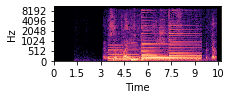

In [21]:
visualize_input(sample_input, dataset_spec, 'spectrogram')

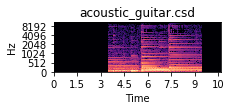

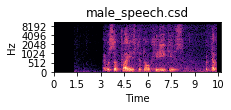

In [22]:
visualize_output(sample_gt, dataset_spec, 'spectrogram', class_names=sample_components)

In [24]:
input_pcm = visualize_input(sample_input, dataset_spec, 'pcm')
gt_pcms = visualize_output(sample_gt, dataset_spec, 'pcm')

In [26]:
IPython.display.Audio(data=input_pcm, rate=dataset_spec['config']['sample_rate'])

In [27]:
IPython.display.Audio(data=gt_pcms[0], rate=dataset_spec['config']['sample_rate'])

In [28]:
IPython.display.Audio(data=gt_pcms[1], rate=dataset_spec['config']['sample_rate'])

visualize sample data

In [30]:
snapshot = torch.load('/results/tianjunm/monaural-source-separation/experiments/snapshots/cSA-BLSTM-sample-wild-mix-t0-2s-5c-sample/200410031336/best.tar')

In [31]:
snapshot['loss']

554437557.0

In [39]:
model.load_state_dict(snapshot['model_state_dict'])

<All keys matched successfully>

In [43]:
model = model.to(device)
model_output = model(model_input.to(device))

In [44]:
model_input = model_input.to(device)

In [45]:
M_r, M_i = model_output[:, :, 0], model_output[:, :, 1]
Y_r = model_input[:, 0].unsqueeze(1)
Y_i = model_input[:, 1].unsqueeze(1)

S_r = M_r * Y_r - M_i * Y_i
S_i = M_r * Y_i + M_i * Y_r

predicted = torch.stack([M_r, M_i], dim=2)

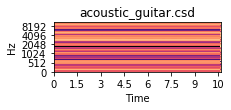

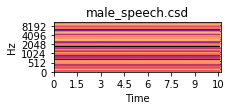

In [38]:
visualize_output(predicted[batch_idx].cpu().detach(), dataset_spec, 'spectrogram', class_names=sample_components)

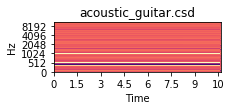

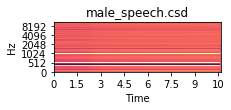

In [46]:
visualize_output(predicted[batch_idx].cpu().detach(), dataset_spec, 'spectrogram', class_names=sample_components)

In [274]:
predicted_pcms = visualize_output(predicted[batch_idx].cpu().detach(), config, 'pcm')

In [275]:
IPython.display.Audio(data=predicted_pcms[0], rate=config['dataset']['config']['sample_rate'])

In [276]:
IPython.display.Audio(data=predicted_pcms[1], rate=config['dataset']['config']['sample_rate'])